In [62]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%config InlineBackend.figure_format='retina'


import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')

In [21]:
import seaborn as sns

In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor


train = pd.read_csv('movies_train.csv')
test = pd.read_csv('movies_test.csv')

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [24]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [25]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [26]:
# 결측치가 많은 데이터 제거
train = train.drop(['dir_prev_bfnum'],axis = 1)
test =  test.drop(['dir_prev_bfnum'],axis = 1)

In [27]:
# 감독명 : 너무 다양해서 제거
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

In [28]:
# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

<AxesSubplot:>

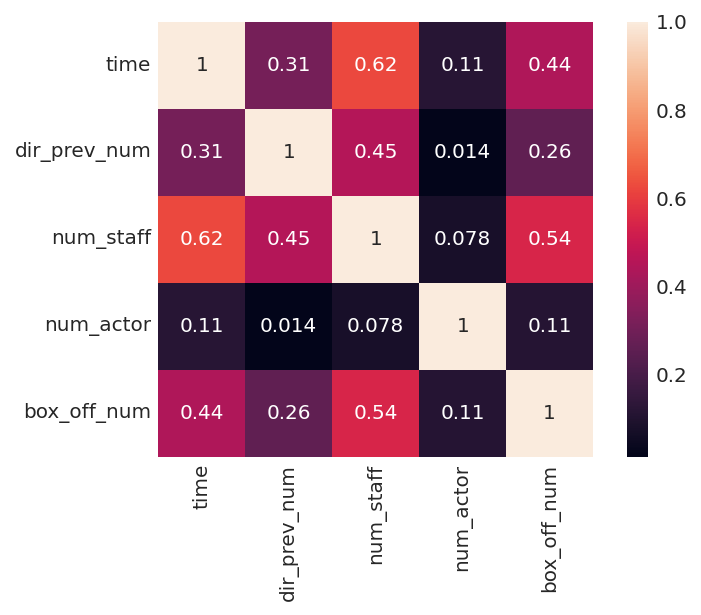

In [29]:
sns.heatmap(train.corr(),square = True, annot = True)

<AxesSubplot:>

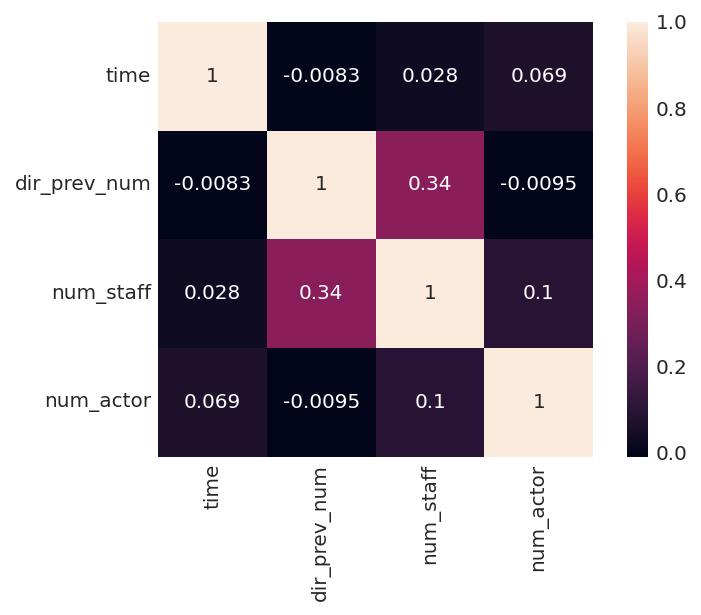

In [30]:
sns.heatmap(test.corr(),square = True, annot = True)

<AxesSubplot:>

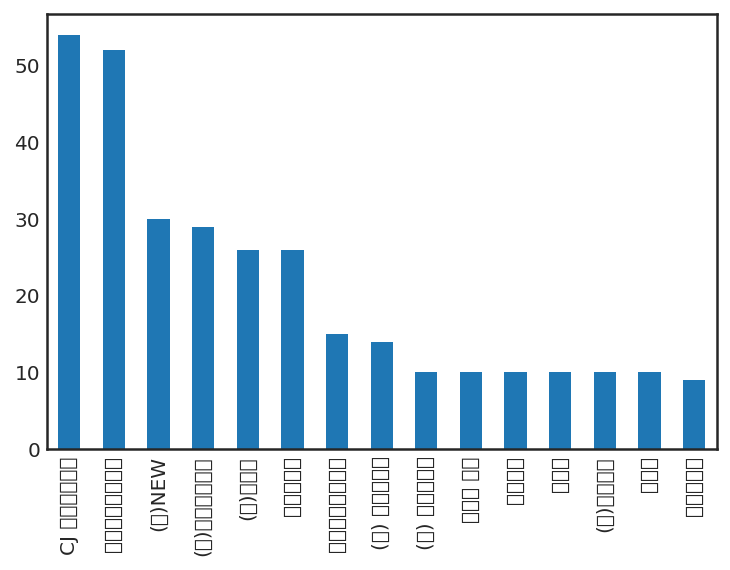

In [63]:
train.distributor.value_counts()[:15].plot(kind='bar') # 배급사 숫자에 따라 무언가 달라지는 것이 있을까요? 

In [32]:
# 개봉일을 바탕으로 년,월 변수 생성
train['년'] = train['release_time'].apply(lambda x: int(x[:4]))
train['월'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['년'] = test['release_time'].apply(lambda x: int(x[:4]))
test['월'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)

In [33]:
display(train)

,distributor,genre,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num,년,월
0,롯데엔터테인먼트,액션,96,청소년 관람불가,0,91,2,23398,2012,11
1,(주)쇼박스,느와르,130,청소년 관람불가,2,387,3,7072501,2015,11
2,(주)쇼박스,액션,123,15세 관람가,4,343,4,6959083,2013,6
3,(주)NEW,코미디,101,전체 관람가,2,20,6,217866,2012,7
4,쇼박스(주)미디어플렉스,코미디,108,15세 관람가,1,251,2,483387,2010,11
...,...,...,...,...,...,...,...,...,...,...
595,(주)NEW,드라마,111,청소년 관람불가,1,510,7,1475091,2014,8
596,(주)쇼박스,드라마,127,15세 관람가,1,286,6,1716438,2013,3
597,(주)마운틴픽쳐스,공포,99,청소년 관람불가,0,123,4,2475,2010,9
598,CJ 엔터테인먼트,느와르,102,15세 관람가,0,431,4,2192525,2015,5


In [34]:
train['시간'] = None

In [35]:
train.index

RangeIndex(start=0, stop=600, step=1)

In [99]:
for i in range(0,600):
    if 90>train.iloc[i,2]:
        train.iloc[i,10]='short'
    elif 110>train.iloc[i,2]>=90:
        train.iloc[i,10]='normal'
    elif train.iloc[i,2]>=110:
        train.iloc[i,10]='long'

<AxesSubplot:>

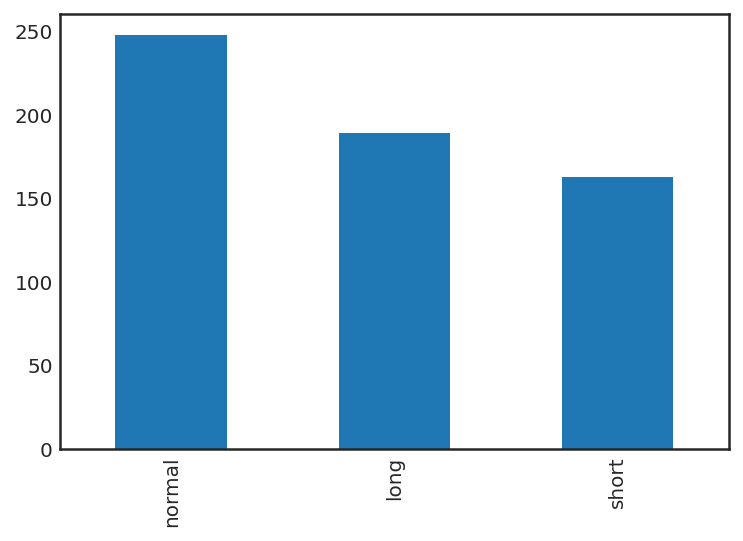

In [100]:
train['시간'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='시간', ylabel='count'>

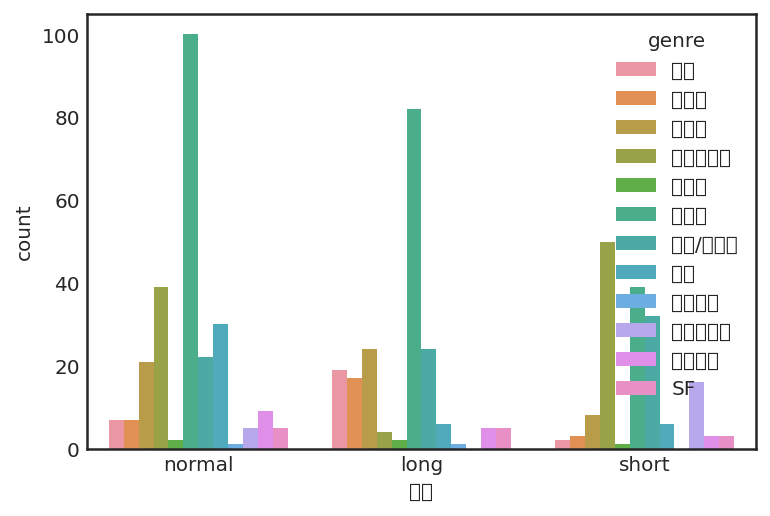

In [101]:
sns.countplot(x='시간', hue='genre', data=train)

<AxesSubplot:xlabel='시간', ylabel='count'>

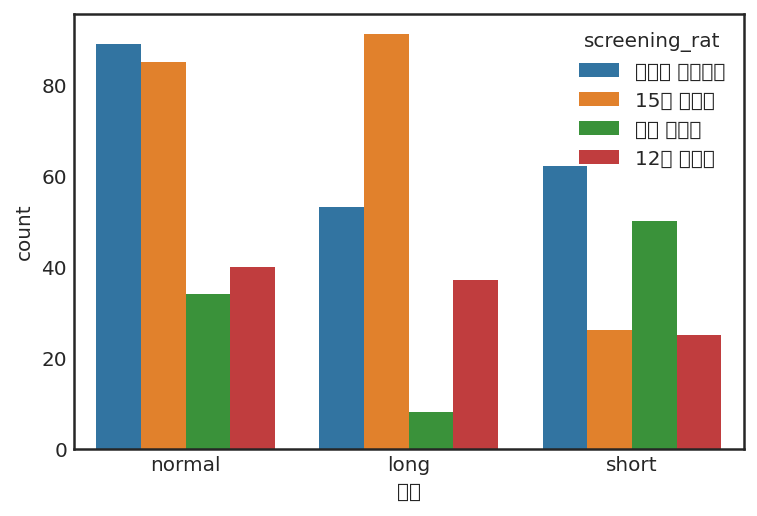

In [102]:
sns.countplot(x='시간', hue='screening_rat', data=train)

<AxesSubplot:xlabel='시간', ylabel='count'>

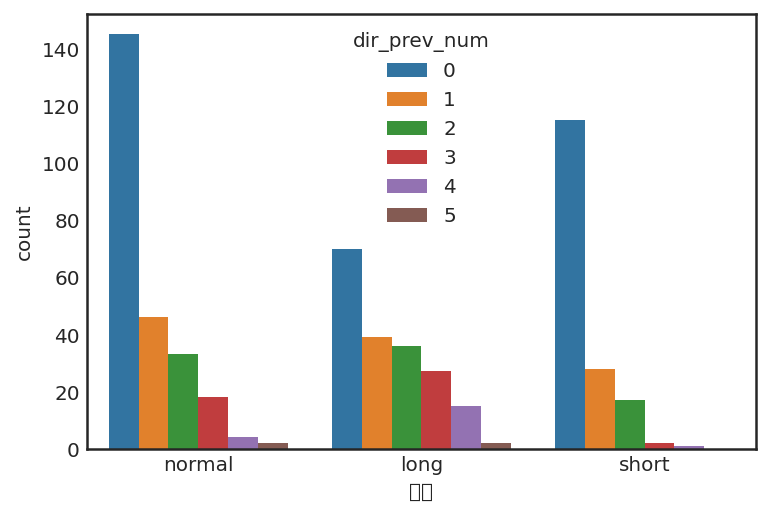

In [103]:
sns.countplot(x='시간', hue='dir_prev_num', data=train)

<AxesSubplot:xlabel='시간', ylabel='count'>

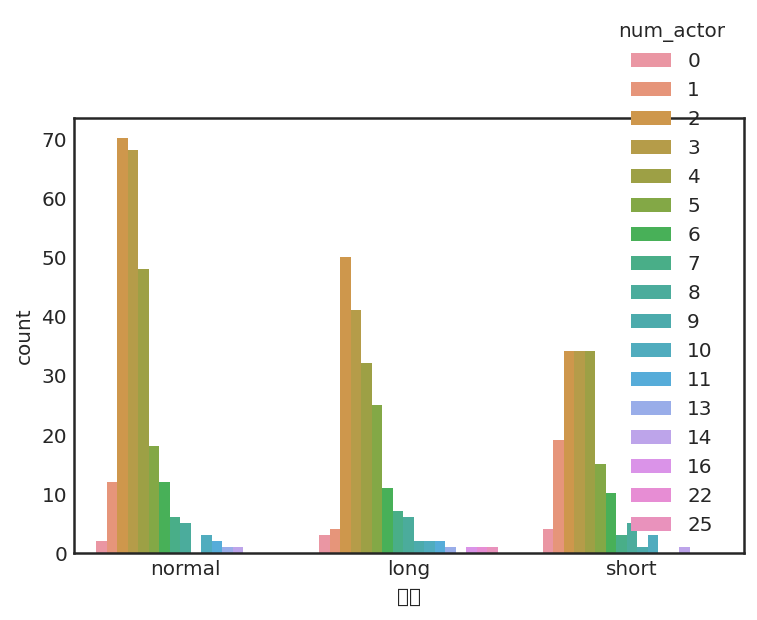

In [104]:
sns.countplot(x='시간', hue='num_actor', data=train)

In [123]:
train[train['box_off_num']>5000000]

,distributor,genre,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num,년,월,시간
1,(주)쇼박스,느와르,130,청소년 관람불가,2,387,3,7072501,2015,11,long
2,(주)쇼박스,액션,123,15세 관람가,4,343,4,6959083,2013,6,long
16,CJ E&M Pictures,코미디,124,15세 관람가,1,572,11,7453715,2011,5,long
74,CJ 엔터테인먼트,액션,119,청소년 관람불가,0,509,2,6178665,2010,8,long
101,(주)쇼박스,드라마,139,15세 관람가,2,298,6,9135806,2013,9,long
122,(주)NEW,드라마,127,15세 관람가,0,311,5,11374879,2013,12,long
288,CJ E&M 영화부문,드라마,121,12세 관람가,4,126,3,5181014,2012,12,long
320,롯데엔터테인먼트,액션,122,15세 관람가,1,687,4,7482180,2011,8,long
322,CJ 엔터테인먼트,드라마,124,12세 관람가,4,520,2,7759711,2015,12,long
326,CJ 엔터테인먼트,미스터리,108,15세 관람가,2,369,2,5443049,2015,11,normal


In [110]:
train_short

,distributor,genre,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num,년,월,시간
10,(주) 케이알씨지,멜로/로맨스,89,청소년 관람불가,0,0,4,745,2015,7,short
15,(주) 영화제작전원사,드라마,67,청소년 관람불가,0,52,3,39317,2014,9,short
26,인디스토리,공포,89,15세 관람가,0,40,10,2807,2010,2,short
27,(주) 케이알씨지,멜로/로맨스,89,청소년 관람불가,0,0,4,745,2015,7,short
32,CJ 엔터테인먼트,애니메이션,85,전체 관람가,0,10,8,285084,2015,4,short
...,...,...,...,...,...,...,...,...,...,...,...
581,인디플러그,코미디,74,청소년 관람불가,1,29,4,532,2015,9,short
582,(주)NEW,애니메이션,62,전체 관람가,0,2,8,446054,2015,12,short
585,인디플러그,다큐멘터리,70,전체 관람가,0,4,1,938,2015,4,short
586,마노엔터테인먼트,드라마,83,12세 관람가,0,2,4,4550,2013,12,short


In [111]:
train_normal

,distributor,genre,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num,년,월,시간
0,롯데엔터테인먼트,액션,96,청소년 관람불가,0,91,2,23398,2012,11,normal
3,(주)NEW,코미디,101,전체 관람가,2,20,6,217866,2012,7,normal
4,쇼박스(주)미디어플렉스,코미디,108,15세 관람가,1,251,2,483387,2010,11,normal
6,백두대간,다큐멘터리,104,전체 관람가,0,32,5,53526,2013,5,normal
7,(주)쇼박스,액션,96,청소년 관람불가,3,342,2,1110523,2012,10,normal
...,...,...,...,...,...,...,...,...,...,...,...
591,씨너스엔터테인먼트(주),코미디,101,청소년 관람불가,0,59,4,14188,2013,8,normal
593,퍼스트런,미스터리,97,청소년 관람불가,0,5,3,1132,2013,9,normal
594,(주)마운틴픽쳐스,코미디,94,청소년 관람불가,0,37,5,1958,2014,3,normal
597,(주)마운틴픽쳐스,공포,99,청소년 관람불가,0,123,4,2475,2010,9,normal


In [109]:
train_long

,distributor,genre,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num,년,월,시간
1,(주)쇼박스,느와르,130,청소년 관람불가,2,387,3,7072501,2015,11,long
2,(주)쇼박스,액션,123,15세 관람가,4,343,4,6959083,2013,6,long
5,롯데엔터테인먼트,코미디,113,15세 관람가,2,262,4,233211,2012,10,long
8,유니버설픽쳐스인터내셔널코리아,뮤지컬,129,전체 관람가,0,3,5,4778,2014,9,long
12,(주)키노아이,드라마,113,12세 관람가,1,14,2,5851,2012,3,long
...,...,...,...,...,...,...,...,...,...,...,...
590,CJ 엔터테인먼트,미스터리,114,청소년 관람불가,0,92,2,1250,2011,3,long
592,CGV아트하우스,느와르,110,청소년 관람불가,3,420,3,1472147,2015,4,long
595,(주)NEW,드라마,111,청소년 관람불가,1,510,7,1475091,2014,8,long
596,(주)쇼박스,드라마,127,15세 관람가,1,286,6,1716438,2013,3,long


In [108]:
train_long=train[train['시간']=='long']
train_normal=train[train['시간']=='normal']
train_short=train[train['시간']=='short']

<AxesSubplot:>

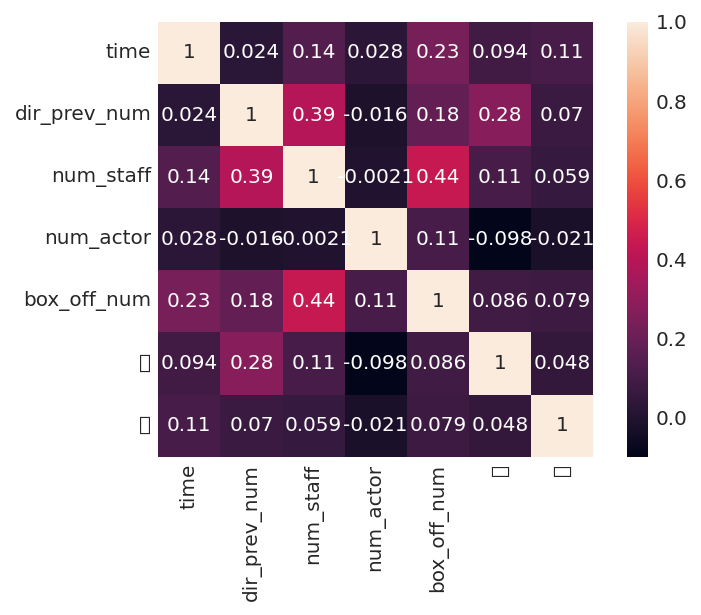

In [120]:
sns.heatmap(train_long.corr(),square = True, annot = True)

<AxesSubplot:>

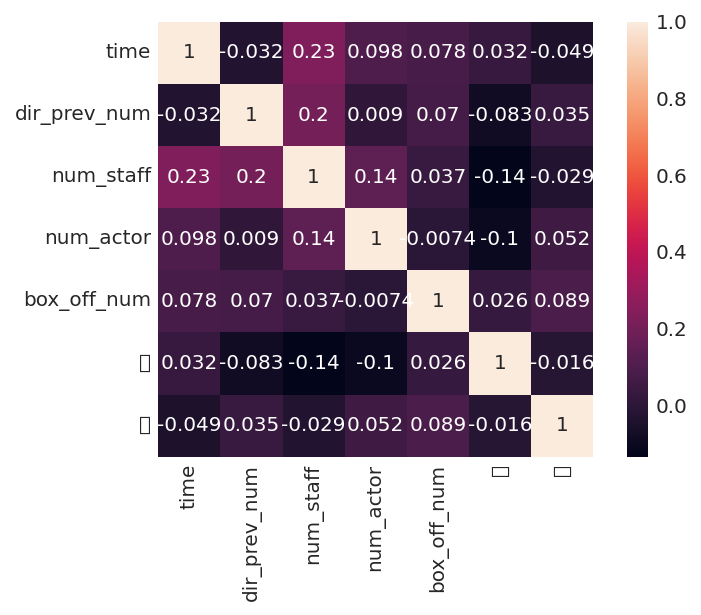

In [121]:
sns.heatmap(train_short.corr(),square = True, annot = True)

<AxesSubplot:>

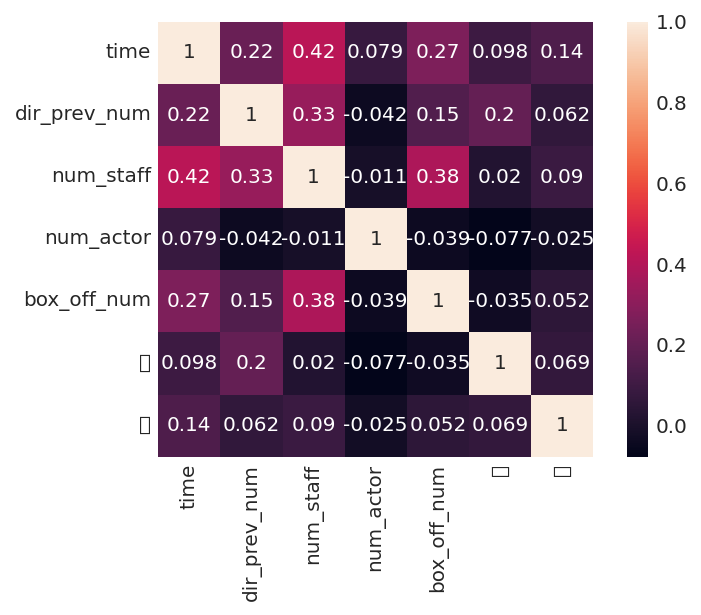

In [122]:
sns.heatmap(train_normal.corr(),square = True, annot = True)

<AxesSubplot:xlabel='시간,genre'>

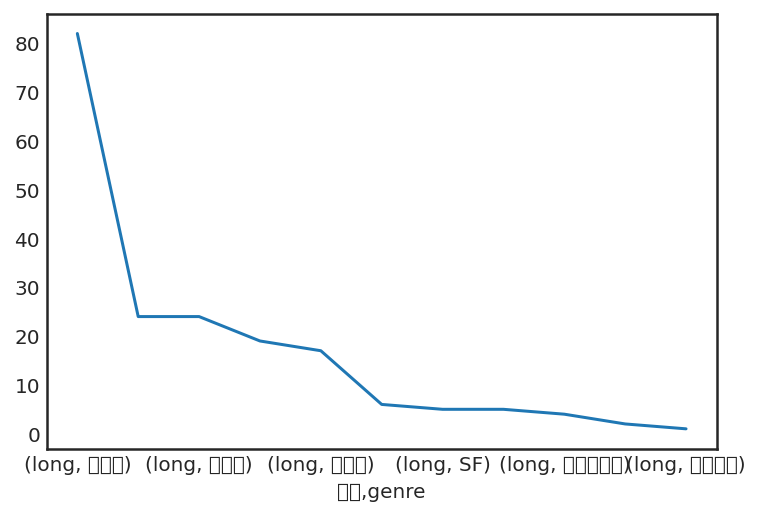

In [107]:
train_long.groupby("시간")['genre'].value_counts().plot()

<AxesSubplot:xlabel='시간,genre'>

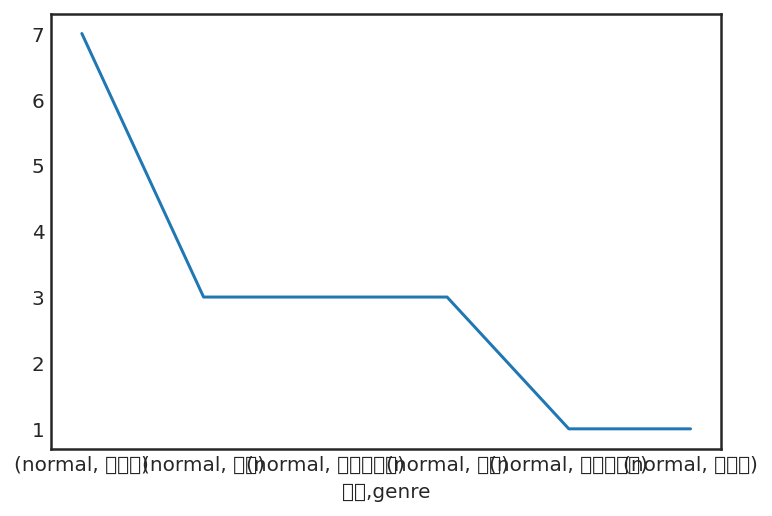

In [94]:
train_normal.groupby("시간")['genre'].value_counts().plot()

<AxesSubplot:xlabel='시간,genre'>

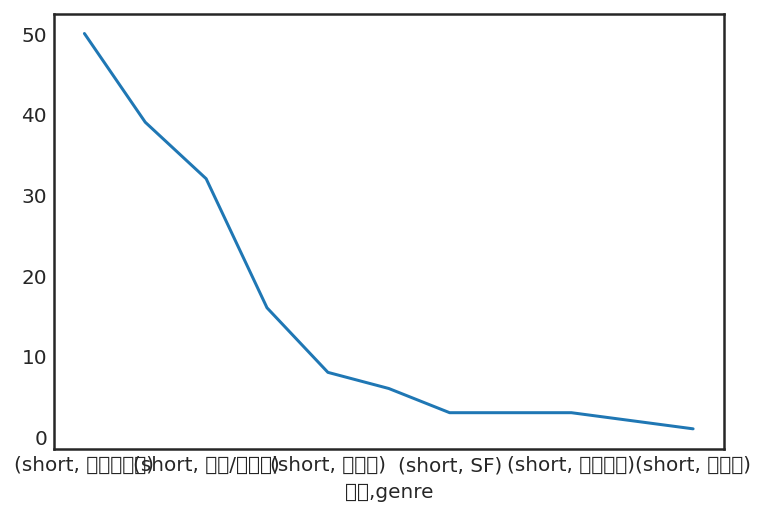

In [95]:
train_short.groupby("시간")['genre'].value_counts().plot()

In [ ]:
# 원핫 인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [ ]:
train

In [ ]:
test